In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [3]:
text1 = open('datasets/carl_sagan_quote4.txt').read()
text2 = open('datasets/carl_sagan_quote2.txt').read()
list = [text1, text2]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["'ve arranged civilization crucial element profoundly depend science technology",
 'also arranged thing almost one understands science technology this prescription disaster might get away sooner later combustible mixture ignorance power going blow face']

In [8]:
vectorizer = TfidfVectorizer()
doc_vector = vectorizer.fit_transform(word_list)

In [9]:
vectorizer.get_feature_names_out()

array(['almost', 'also', 'arranged', 'away', 'blow', 'civilization',
       'combustible', 'crucial', 'depend', 'disaster', 'element', 'face',
       'get', 'going', 'ignorance', 'later', 'might', 'mixture', 'one',
       'power', 'prescription', 'profoundly', 'science', 'sooner',
       'technology', 'thing', 'this', 'understands', 've'], dtype=object)

In [10]:
doc_vector.shape

(2, 29)

In [12]:
print(doc_vector)

  (0, 24)	0.2594822360637418
  (0, 22)	0.2594822360637418
  (0, 8)	0.36469322896147516
  (0, 21)	0.36469322896147516
  (0, 10)	0.36469322896147516
  (0, 7)	0.36469322896147516
  (0, 5)	0.36469322896147516
  (0, 2)	0.2594822360637418
  (0, 28)	0.36469322896147516
  (1, 11)	0.21557165827234373
  (1, 4)	0.21557165827234373
  (1, 13)	0.21557165827234373
  (1, 19)	0.21557165827234373
  (1, 14)	0.21557165827234373
  (1, 17)	0.21557165827234373
  (1, 6)	0.21557165827234373
  (1, 15)	0.21557165827234373
  (1, 23)	0.21557165827234373
  (1, 3)	0.21557165827234373
  (1, 12)	0.21557165827234373
  (1, 16)	0.21557165827234373
  (1, 9)	0.21557165827234373
  (1, 20)	0.21557165827234373
  (1, 26)	0.21557165827234373
  (1, 27)	0.21557165827234373
  (1, 18)	0.21557165827234373
  (1, 0)	0.21557165827234373
  (1, 25)	0.21557165827234373
  (1, 1)	0.21557165827234373
  (1, 24)	0.15338101033508786
  (1, 22)	0.15338101033508786
  (1, 2)	0.15338101033508786


In [13]:
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names())
df.columns = ['text1', 'text2']
df

C:\Users\Lena\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,text1,text2
almost,0.000000,0.215572
also,0.000000,0.215572
arranged,0.259482,0.153381
away,0.000000,0.215572
blow,0.000000,0.215572
civilization,0.364693,0.000000
combustible,0.000000,0.215572
crucial,0.364693,0.000000
depend,0.364693,0.000000
disaster,0.000000,0.215572


In [15]:
freq = df.iloc[:,0].sort_values(ascending=False, inplace=False)
freq

ve              0.364693
civilization    0.364693
profoundly      0.364693
element         0.364693
crucial         0.364693
depend          0.364693
technology      0.259482
science         0.259482
arranged        0.259482
thing           0.000000
this            0.000000
mixture         0.000000
understands     0.000000
sooner          0.000000
prescription    0.000000
power           0.000000
one             0.000000
almost          0.000000
might           0.000000
later           0.000000
also            0.000000
going           0.000000
get             0.000000
face            0.000000
disaster        0.000000
combustible     0.000000
blow            0.000000
away            0.000000
ignorance       0.000000
Name: text1, dtype: float64

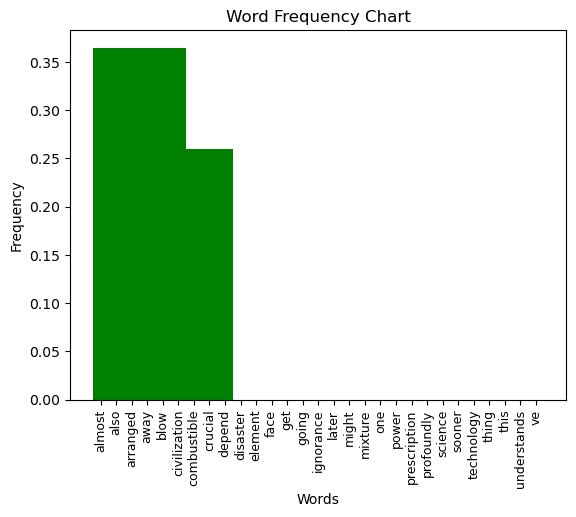

In [16]:
words = df.index
xvalues = np.arange(len(df.index))
width = 1.0
ax = plt.axes(frameon=True)
ax.set_xticks(xvalues)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(xvalues,freq, width,color='g' )
plt.show()

## Reference:

http://www.nltk.org/book/ch02.html